<a href="https://colab.research.google.com/github/shahid9455/iCodeGuru/blob/main/Hand%20Written%20Digits%20Detection%20using%20Deep%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import files
from PIL import Image, ImageOps

In [4]:
gpu_available = tf.config.list_physical_devices('GPU')

if gpu_available:
  print('GPU is available')
else:
  print('GPU is not available')

GPU is available


In [5]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [7]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [8]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9023 - loss: 0.3223 - val_accuracy: 0.9842 - val_loss: 0.0479
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9854 - loss: 0.0460 - val_accuracy: 0.9830 - val_loss: 0.0528
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9898 - loss: 0.0324 - val_accuracy: 0.9894 - val_loss: 0.0345
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9926 - loss: 0.0239 - val_accuracy: 0.9901 - val_loss: 0.0305
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9934 - loss: 0.0202 - val_accuracy: 0.9895 - val_loss: 0.0353


In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9864 - loss: 0.0427
Test accuracy: 0.9894999861717224


In [27]:
def preprocessing_image(image):
    image = image.convert('L')
    image = ImageOps.expand(image, border=10, fill=0)
    image = image.resize((28, 28))
    image = np.array(image).astype('float32') / 255.0
    image = np.expand_dims(image, axis=-1)
    image = np.expand_dims(image, axis=0)
    return image

In [29]:
uploaded = files.upload()

Saving WhatsApp Image 2024-10-24 at 17.13.41_1c764f5c.jpg to WhatsApp Image 2024-10-24 at 17.13.41_1c764f5c.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


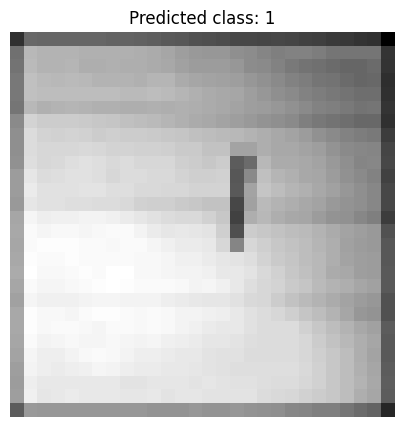

In [30]:
for fn in uploaded.keys():
  image = Image.open(fn)
  processed_image = preprocessing_image(image)
  prediction = model.predict(processed_image)
  predicted_class = np.argmax(prediction)

  plt.figure(figsize=(5,5))
  plt.imshow(processed_image[0].reshape(28,28), cmap = 'gray')
  plt.title(f'Predicted class: {predicted_class}')
  plt.axis('off')
  plt.show()